In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
import random
from skimage.feature import hog
from skimage.color import rgb2gray
import cv2

In [ ]:
# configurare cale catre dataset
path_to_dataset = "/content/drive/MyDrive/animale_dataset"

# dimensiune imagini
IMG_HEIGHT, IMG_WIDTH = 128, 128

In [ ]:
# pregatirea date
def load_data(dataset_path):
    X = []
    y = []
    classes = os.listdir(dataset_path)  # fiecare folder reprezintă o clasă

    for label in classes:
        folder_path = os.path.join(dataset_path, label)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                # Încărcăm imaginea folosind cv2
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convertire in RGB
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # redimensionare
                X.append(img)
                y.append(label)
            except Exception as e:
                print(f"Eroare la încărcarea imaginii {img_path}: {e}")

    return np.array(X), np.array(y)


In [ ]:
# incarcare datele
X, y = load_data(path_to_dataset)

In [ ]:
# normalizare imagini si transforma etichetele in valori numerice
X = X / 255.0  # normalizare
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# se impart datele in seturi de antrenare si test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# se extrag trasaturi folosind HOG
def extract_features(images):
    features = []
    for img in images:
        # se verifica daca imaginea are 3 canale (color), apoi se converteste in grayscale
        if img.shape[-1] == 3:
            img_gray = rgb2gray(img)
        else:
            img_gray = img  # imaginea este deja grayscale
        # se calculeaza trasaturile HOG
        feature = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        features.append(feature)
    return np.array(features)

In [ ]:
X_train_features = extract_features(X_train) # extrage trasaturi relevante din imaginile de antrenament si test
X_test_features = extract_features(X_test)

In [ ]:
# antrenare modelul SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_features, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
# se fac predictii
y_pred = svm_model.predict(X_test_features)

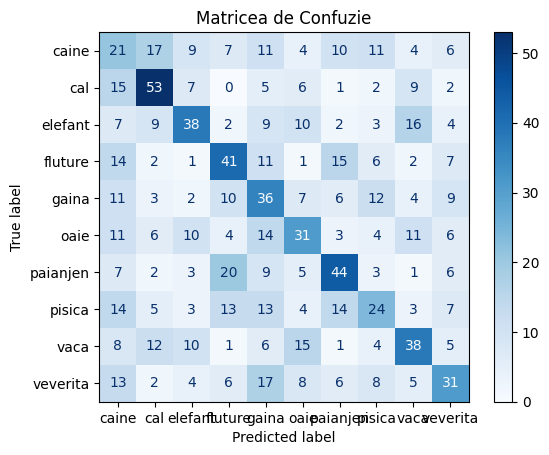

In [ ]:
# matricea de confuzie si indicatorii de performanta
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Matricea de Confuzie")
plt.show()

In [ ]:
# se afiseaza indicatorii de performanta
print("Indicatori de performanță:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Indicatori de performanță:
              precision    recall  f1-score   support

       caine       0.17      0.21      0.19       100
         cal       0.48      0.53      0.50       100
     elefant       0.44      0.38      0.41       100
     fluture       0.39      0.41      0.40       100
       gaina       0.27      0.36      0.31       100
        oaie       0.34      0.31      0.32       100
    paianjen       0.43      0.44      0.44       100
      pisica       0.31      0.24      0.27       100
        vaca       0.41      0.38      0.39       100
    veverita       0.37      0.31      0.34       100

    accuracy                           0.36      1000
   macro avg       0.36      0.36      0.36      1000
weighted avg       0.36      0.36      0.36      1000



In [ ]:
# vizualizare rezultate corecte si gresite
def visualize_predictions(X, y_true, y_pred, label_encoder):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        idx = random.randint(0, len(X) - 1)
        plt.subplot(3, 3, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {label_encoder.inverse_transform([y_true[idx]])[0]}\nPred: {label_encoder.inverse_transform([y_pred[idx]])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

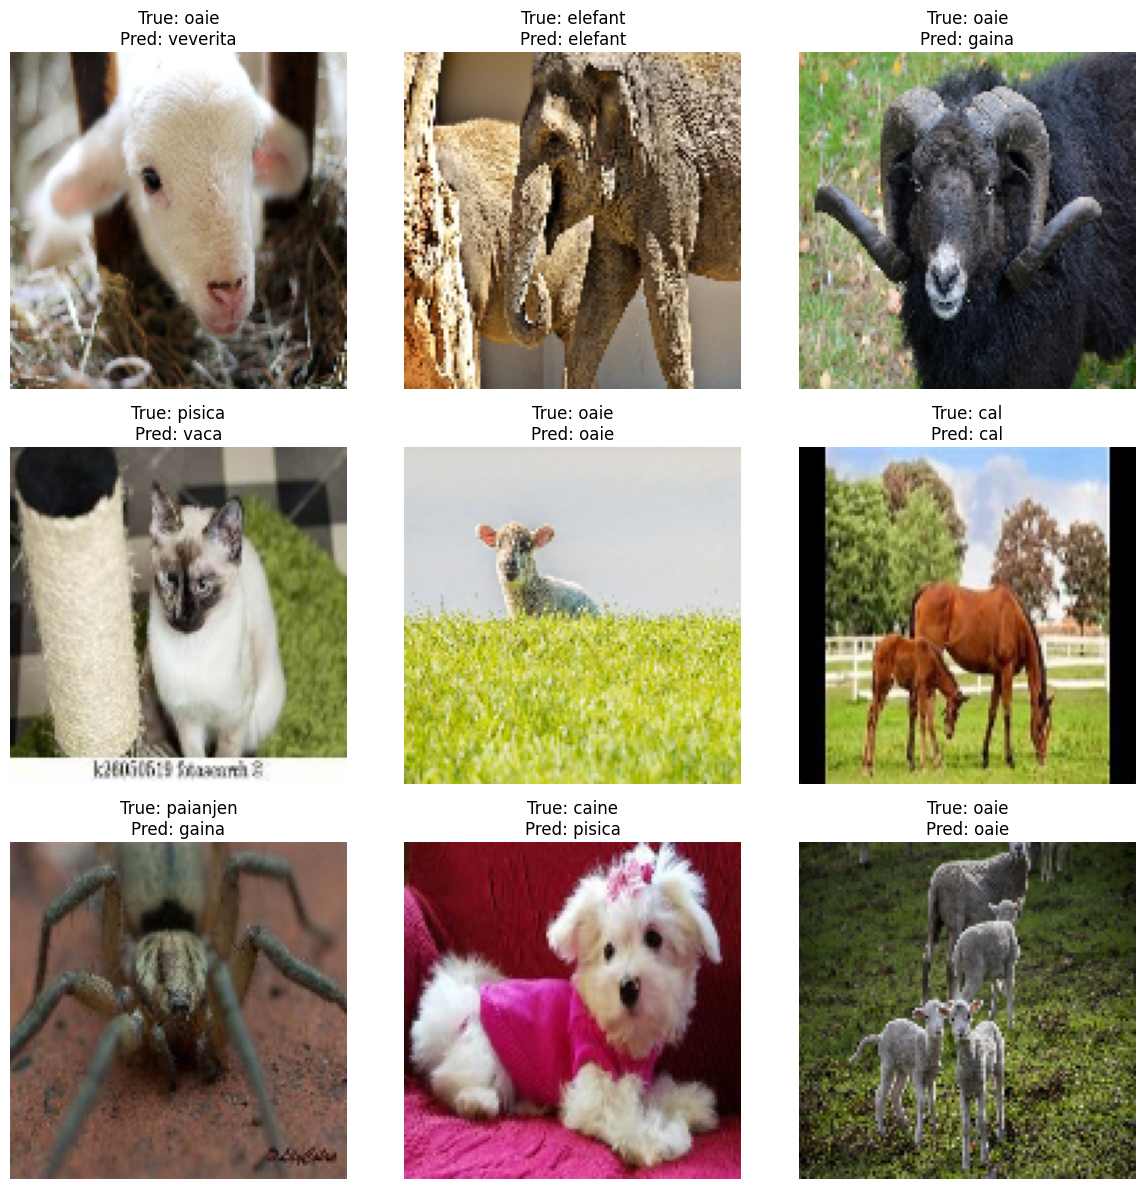

In [ ]:
visualize_predictions(X_test, y_test, y_pred, label_encoder)